# Lab03: Logistic Regression.

- Student ID: Huỳnh Sỉ Kha
- Student name: 21127734

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`). Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Logistic Regression.

## 1. Feature Extraction

### Import Library

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

### Load data

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', return_X_y=True, parser='auto')

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Extract Features

So we basically have 70000 samples with each sample having 784 features - pixels in this case and a label - the digit the image represent.

Let’s play around and see if we can extract any features from the pixels that can be more informative. First I’d like to know more about average intensity - that is the average value of a pixel in an image for the different digits

In [4]:
labels=np.unique(y)
# print(labels)
n_label=np.unique(y).shape[0]
l_means=np.zeros(shape=n_label,dtype=float) # array stores average intensity for each label

#TODO compute average intensity for each label
for i in range(n_label):
    l_means[i]=np.mean(X[y==labels[i]])

print(l_means)

[44.17740512 19.40680177 38.03420776 36.15420938 30.99599983 32.95015873
 35.23486491 29.21798737 38.39790125 31.35940809]


Plot the average intensity using matplotlib

<BarContainer object of 10 artists>

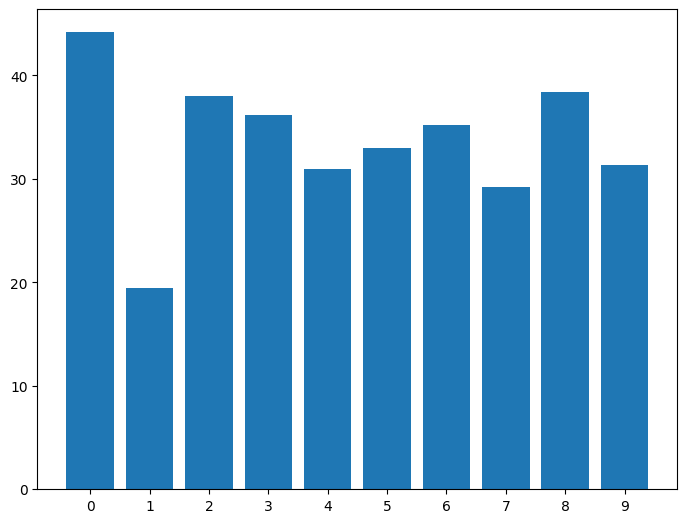

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,l_means)

As we can see there are some differences in intensity. The digit “1” is the less intense while the digit “0” is the most intense. So this new feature seems to have some predictive value if you wanted to know if say your digit is a “1” or not.

In [6]:
#TODO compute average intensity for each data sample
# intensity=?
intensity=np.mean(X,axis=1)

print(intensity.shape)

(70000,)


Sometimes people really do not know what are they doing. I am not an exception:

In [7]:
X = X.values
X_flip=np.flip(X, axis=1)
symmetry= np.mean(np.abs(X-X_flip),axis=1)
print(symmetry.shape)


(70000,)


I called this feature "symmetry" (though it's not "symmetry" at all). Use visualization method to understand why this thing works.

Our new trainning data will have 70000 samples and 2 features: intensity, symmetry.

In [8]:
# TODO create X_new by horizontal stack intensity and symmetry
X_new = np.column_stack((intensity, symmetry))

print(X_new.shape)  # it should be (70000,2)

(70000, 2)


## 2. Training 

Usually logistic regression is a good first choice for classification. In this homework we use logistic regression for classifying digit 1 images and not digit 1 images.

### Normalize data
First normalize data using Z-score normalization
- **TODO: Study about Z-score normalization**

#### Concept:

- **Formula**: The Z-score of a value is calculated using the formula: 
  $$ Z = \frac{(X - \mu)}{\sigma} $$
  - $ X $ is the value to be normalized 
  - $ \mu $ is the mean of the dataset
  - $ \sigma $ is the standard deviation of the dataset.

#### Significance:
- Mean and standard deviation: After normalization, the data will have a mean (average) of 0 and a standard deviation of 1.
- Comparing and combining data: This technique helps to bring features with different ranges of values to a common scale, making it more objective and effective to compare and combine them in machine learning models.

#### Applications:

- In machine learning: Z-score normalization is commonly used in machine learning algorithms, especially those sensitive to the scale of data, such as K-means clustering or deep learning models.
- Data preprocessing before model training: Normalizing data can speed up the convergence of machine learning algorithms and improve model performance.

- **TODO: Why should we normalize data?**

1. Equalizes feature scales: Normalization ensures that each feature contributes equally to the analysis by bringing different scales to a uniform level.

2. Boosts gradient descent efficiency: In algorithms using gradient descent, normalization speeds up convergence by transforming the optimization landscape into a more symmetric shape.

3. Mitigates outlier influence: By scaling data to a smaller range, the excessive impact of outliers is reduced.

4. Improves algorithm performance: Algorithms like K-Nearest Neighbors and K-Means, which rely on distance calculations, perform better when all features are normalized.

5. Stabilizes neural network training: Normalization helps meet neural network input expectations, aiding in better training performance and stability.

6. Prevents numerical instabilities: Normalizing can help avoid issues related to how computers handle floating-point numbers, especially in high-dimensional data.

7. Aligns with model assumptions: Certain algorithms assume normally distributed features; normalization helps approximate these conditions.


In [9]:
#TODO: normalize X_new

X_new = (X_new - np.mean(X_new, axis=0)) / np.std(X_new, axis=0)

### Construct  data

In [10]:
X_new = np.hstack((np.ones((len(X_new), 1)), X_new)) #stack 1s column as usual
y_new=y.astype(int)
y_new[y_new != 1] = 0 # digit 1 -> class 1, other digits -> class 0
# Convert y_new to a 2D array with one column (Numpy)
y_new = y_new.to_numpy()
y_new=y_new.reshape(-1,1)

### Split data 

In [11]:
train_X, test_X, train_y, test_y = train_test_split(X_new, y_new, test_size= int(1/3*X.shape[0]))
print(train_X.shape)
print(train_y.shape)

(46667, 3)
(46667, 1)


### Sigmoid function and derivative of the sigmoid function

In [12]:
def sigmoid_activation(x):
    """compute the sigmoid activation value for a given input"""
    # Clip the input values to a specific range to prevent overflow
    clipped_x = np.clip(x, -500, 500)
    
    # Compute the sigmoid using the clipped input (clipped_x)
    return 1.0 / (1 + np.exp(-clipped_x))

def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    return x * (1 - x)

### Compute output

In [13]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    return sigmoid_activation(X.dot(W))
def predict(W, X):
 
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #........
    preds=sigmoid_activation(X.dot(W))
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0.5] = 1

    return preds

### Compute gradient

**Loss Function: Average negative log likelihood**
$$\mathcal{L}=\dfrac{1}{N} \sum_{i=1}^{N} -\left(y^{i}\ln h_{\mathbf{w}}\left(\mathbf{x}^{i}\right)+\left(1-y^{i}\right)\ln \left(1-h_{\mathbf{w}}\left(x^{i}\right)\right)\right) $$


$$\text{Sigmoid Activation: } z= \sigma \left(h\right)= \dfrac{1}{1+e^{-h}}$$

$$\text{Cross-entropy: } J(w)=-\left({ylog(z)+(1-y)log(1-z)}\right)$$

$$\text{Chain rule: } \dfrac{\partial J(w)}{\partial w}=\dfrac{\partial J(w)}{\partial z} \dfrac{\partial z}{\partial h}\dfrac{\partial h}{\partial w}  $$

$$\dfrac{\partial J(w)}{\partial z}=-\left(\dfrac{y}{z}-\dfrac{1-y}{1-z}\right)=\dfrac{z-y}{z(1-z)}$$

$$\dfrac{\partial z}{\partial h}=z(1-z)$$

$$\dfrac{\partial h}{\partial w}=X$$

$$\dfrac{\partial J(w)}{\partial w}=X^T(z-y)$$

In [14]:
def compute_gradient(X, error):
    """
    This is the gradient descent update of "average negative loglikelihood" loss function. 
    In lab02 our loss function is "sum squared error".
    """
    #TODO
    gradient = X.T.dot(error)
    return gradient

In [15]:
# Prevent divide by zero
def safe_log(x):
    return np.log(np.clip(x, 1e-10, 1 - 1e-10))

def train(W,train_X, train_y, learning_rate, num_epochs, losses):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W,train_X)
        error = h - train_y
        # loss = np.mean(- train_y * np.log(h) - (1 - train_y) * np.log(1 - h))
        loss = np.mean(- train_y * safe_log(h) - (1 - train_y) * safe_log(1 - h))
        losses.append(loss)
        gradient=compute_gradient(train_X, error)
        W += -learning_rate * gradient
        if ((epoch+1)%1000==0): print ('Epoch %d, loss %.3f' %(epoch+1, loss))
        
    return W

### Train our model

In [16]:
W = np.random.randn(train_X.shape[1], 1)
losses=[]
num_epochs=40000
learning_rate=0.01
W=train(W,train_X, train_y, learning_rate, num_epochs , losses)
x_preds=predict(W ,train_X)
train_err = np.mean(x_preds != train_y) * 100
print ('=' * 50)
print ('Train err of final w: ', train_err)

Epoch 1000, loss 1.312
Epoch 2000, loss 1.312
Epoch 3000, loss 1.312
Epoch 4000, loss 1.312
Epoch 5000, loss 1.312
Epoch 6000, loss 1.312
Epoch 7000, loss 1.312
Epoch 8000, loss 1.312
Epoch 9000, loss 1.312
Epoch 10000, loss 1.312
Epoch 11000, loss 1.312
Epoch 12000, loss 1.312
Epoch 13000, loss 1.312
Epoch 14000, loss 1.312
Epoch 15000, loss 1.312
Epoch 16000, loss 1.312
Epoch 17000, loss 1.312
Epoch 18000, loss 1.312
Epoch 19000, loss 1.312
Epoch 20000, loss 1.312
Epoch 21000, loss 1.312
Epoch 22000, loss 1.312
Epoch 23000, loss 1.312
Epoch 24000, loss 1.312
Epoch 25000, loss 1.312
Epoch 26000, loss 1.312
Epoch 27000, loss 1.312
Epoch 28000, loss 1.312
Epoch 29000, loss 1.312
Epoch 30000, loss 1.312
Epoch 31000, loss 1.312
Epoch 32000, loss 1.312
Epoch 33000, loss 1.312
Epoch 34000, loss 1.312
Epoch 35000, loss 1.312
Epoch 36000, loss 1.312
Epoch 37000, loss 1.312
Epoch 38000, loss 1.312
Epoch 39000, loss 1.312
Epoch 40000, loss 1.312
Train err of final w:  8.018514153470333


## 3. Evaluate our model

In [17]:
preds = predict(W, train_X)
print(classification_report(train_y, preds))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     41413
           1       0.59      0.92      0.72      5254

    accuracy                           0.92     46667
   macro avg       0.79      0.92      0.84     46667
weighted avg       0.94      0.92      0.93     46667



In [18]:
preds = predict(W, test_X)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     20710
           1       0.59      0.93      0.72      2623

    accuracy                           0.92     23333
   macro avg       0.79      0.92      0.84     23333
weighted avg       0.95      0.92      0.93     23333



**TODO: Comment on the result**

### Conclusions:

1. **High Precision for Class 0**: 
   - Precision for class 0 is high (0.97), indicating that when the model predicts a sample as class 0, it is very likely to be correct. However, this needs to be balanced against other metrics.
2. **Lower Recall for Class 0**: 
   - The recall for class 0 is relatively lower (0.77), implying that the model misses about 23% of actual class 0 instances. 
3. **Low Precision but High Recall for Class 1**: 
   - For class 1, the precision is low (around 0.31-0.32), meaning that many of the instances predicted as class 1 are false positives. However, the recall is high (0.82-0.84), indicating the model is good at capturing most of the actual class 1 instances.
4. **Overall Accuracy**: 
   - The accuracy is around 77-78%, which is decent but can be misleading due to class imbalance. The model is better at identifying class 1 instances than correctly labeling class 0 instances.
5. **Macro and Weighted Averages**: 
   - The macro average, which treats both classes equally, is lower than the weighted average, which gives more weight to the majority class (class 0). This difference is due to the class imbalance and reflects in the f1-scores.
6. **Imbalance Between Classes**: 
   - The significant difference in support numbers between classes (more than 7 times) indicates a class imbalance problem. This imbalance likely contributes to the disparities in precision and recall between the two classes.


### Causes of imbalance:

1. **Data imbalance**:
   - The significant difference in sample sizes between the two classes (41410 vs. 5257 in the training set, 20713 vs. 2620 in the test set) is a primary cause.
   - The model might have "learned" that predicting all samples as class 0 yields a high success rate, thus becoming biased towards the majority class.
2. **Model capability**:
   - Logistic Regression, being a linear model, might not suit the complex nature of the data, or fail to capture non-linear relationships between features and the target class.

### Solutions:

1. **Reconsider data handling**:
   - Apply resampling techniques such as oversampling for the minority class or undersampling for the majority class.
   - Use the SMOTE method to generate synthetic data for the minority class.
2. **Change evaluation metrics**:
   - Use metrics like F1-score, Precision-Recall AUC, or ROC AUC instead of relying solely on accuracy.

## References:

1. Nevil, S. (2023, March 31). How to calculate Z-Score and its meaning. Investopedia. 
  - https://www.investopedia.com/terms/z/zscore.asp
2. StatQuest with Josh Starmer. (2018, March 5). StatQuest: Logistic Regression [Video]. 
  - YouTube. https://www.youtube.com/watch?v=yIYKR4sgzI8
3. StatQuest with Josh Starmer. (2017, July 31). Maximum Likelihood, clearly explained!!! [Video]. 
  - YouTube. https://www.youtube.com/watch?v=XepXtl9YKwc 
4. Leung, K. (2022, October 4). Assumptions of logistic regression, clearly explained. 
  - Medium site. https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290
5. Satpathy, S. (2023, November 17). SMOTE for Imbalanced Classification with Python. Analytics Vidhya. 
  - https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/